In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Obvious approach would be geeting a mean value, though, as one can see later, it does not work that well and
even in the simple steady posture tests it returns a result with some biases. The reason for it is that it does not handle the situation of transmission between 0 and 360 degress, which, in fact, are the same degrees

In [2]:
def bias_calculation(path_to_file: str = 'datasets/steady/angles_steady.csv',
                     coord: str = 'x1') -> None:
    
    # -------- for comparison block, should be deleted in the application -------
    df = pd.read_csv(path_to_file)
    # print(df)
    df['computer_time'] -= df['computer_time'][0]
    data = df[coord]
    mean_value = data.mean()
    print(f'Mean value of the {coord} is {mean_value}')
    # -------- for comparison block, should be deleted in the application -------
    
    sns.set_theme()
    
    # -------- main logic ----------
    sin_sum = sum(np.sin(np.deg2rad(df[coord])))
    cos_sum = sum(np.cos(np.deg2rad(df[coord])))
    res = np.arctan2(sin_sum / len(df[coord]), cos_sum / len(df[coord]))
    res = np.rad2deg(res)
     # -------- main logic ----------

    print(f'Calulated angle via trigonometry is {res}')

    sns.displot(data=data, kde = True)
    plt.axvline(mean_value, 0, max(data), color='green')
    plt.axvline(res, 0, max(data), color  = 'red')

The more sufficient way to do this, would be using some approach that would allow to calculate Mean of circular quantities. The most widely spreed approach to it is using atan:
![Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/bdeec926c6f3a31de4a83adc63bcc2a3959e4283)
\'This computation produces a different result than the arithmetic mean, with the difference being greater when the angles are widely distributed. For example, the arithmetic mean of the three angles 0°, 0° and 90° is (0+0+90)/3 = 30°, but the vector mean is 26.565°. Moreover, with the arithmetic mean the circular variance is only defined ±180°.\'

Mean value of the z1 is 2.46706873202306
Calulated angle via trigonometry is 2.46720334124205
Mean value of the z1 is -47.248363615629074
Calulated angle via trigonometry is -59.40255655459785


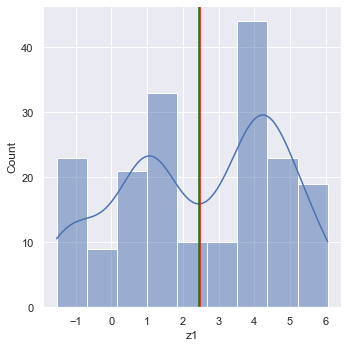

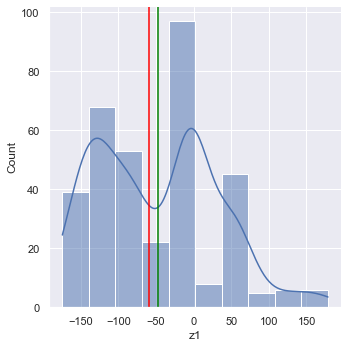

In [3]:
%matplotlib inline
for file in ['datasets/steady/angles_steady.csv', 'datasets/walking/angles_walking.csv']:
    bias_calculation(file, coord='z1')